# Linear Regression

*Introduction*

If we assume that an output data we are interested in is linearly dependent on one or more input data, we can model it using linear regression (you may know this as 'fitting a straight line' to a dataset).

This notebook will introduce how to do linear regression in python, and assumes that you know no python. 

**Regression**: The association between one variable (the *dependent* variable) and one or more *independent* variable

The *dependent variable* is also often called *y* or the **target** or **label** or the output data.

The *independent variable(s)* are often called *x* or *X* or **features** or the input data. 

You use regression to fit a **model** to the input data which predicts the output data. 

(Sorry for the multiple terms for the same thing, different fields talk about the same thing in different ways).

First we must import relevant packages (see the next box):

`numpy` is numerical python, and has lots of mathematical functions we will need.

`pandas` is used to import data

`matplotlib` allows us to plot things

`skikitlearn` allows us to fit data and do data science and machine learning.

Note that, to avoid a lot of typing, we give the packages and shorter name, ie. `np'.

In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline  

Now, we want some data to fit, for this example, I will generate some data (don't worry about this, we generally want to read in an fit real data rather than generate it!).

# Getting the data

In [22]:
# Generate 'random' data
np.random.seed(0)
x = 2.5 * np.random.randn(100) + 1.5   # Array of 100 values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(100)       # Generate 100 residual terms
y = 2 + 0.3 * x + res                  # Actual values of Y

Now we've made some random data called x and y, which is an array. To have a quick look at it, type `x` into the blank cell below and hit cntl-enter

In [23]:
x

array([ 5.91013086,  2.50039302,  3.94684496,  7.102233  ,  6.16889498,
       -0.9431947 ,  3.87522104,  1.12160698,  1.24195287,  2.52649625,
        1.86010893,  5.13568377,  3.40259431,  1.80418754,  2.60965808,
        2.33418582,  5.23519768,  0.98710434,  2.28266925, -0.63523935,
       -4.88247454,  3.13404649,  3.6610905 , -0.35541255,  7.17438656,
       -2.13591419,  1.61439629,  1.03204037,  5.33194804,  5.17339692,
        1.88736856,  2.4454063 , -0.71946437, -3.45199117,  0.63021963,
        1.89087242,  4.5757267 ,  4.50594962,  0.53168296,  0.74424312,
       -1.12138241, -2.05004484, -2.76567548,  6.37693849,  0.22586955,
        0.40481425, -1.6319884 ,  3.44372589, -2.53474462,  0.9681493 ,
       -0.7386664 ,  2.46725624,  0.22298716, -1.45158046,  1.42954443,
        2.57082968,  1.66629306,  2.25617974, -0.08580523,  0.59314709,
       -0.18115112,  0.6011171 , -0.53286571, -2.81570651,  1.94356536,
        0.49554766, -2.57549587,  2.65695564, -0.76824591,  1.62

# Organising our data

Pandas has something called a `DataFrame` which will hold our x and y data (think of it like columns in an excel spreadsheet). We have our data, `x` and `y`, but, like an Excel spreadsheet, we want to label our columns. To do this we make something called a *dictionary*, as below. Here, we've mapped the label X to the data x, and label Y to the data y, note the '' around 'X' and 'Y', this makes these letters a string (i.e. text), rather than anything else. The labels 'X' and 'Y' are the *keys* to the dictionary. 

*Aside on python terminology:* Dictionaries can be made by mapping the data `x` to the string `'X'` in one go, as below. Alternatively, one can make an empty dictionary like this: `data={}` and add in the data after, like this: `data['X'] = x` and `data['Y'] = y`, note that dictionaries are instantiated with curley brakets, and the keys are put in to them after with square brackets. 

In [24]:
data={'X': x, 'Y': y}

Again, why not have a quick look at what this data is by typing `data` in the box below. 

In [25]:
data

{'X': array([ 5.91013086,  2.50039302,  3.94684496,  7.102233  ,  6.16889498,
        -0.9431947 ,  3.87522104,  1.12160698,  1.24195287,  2.52649625,
         1.86010893,  5.13568377,  3.40259431,  1.80418754,  2.60965808,
         2.33418582,  5.23519768,  0.98710434,  2.28266925, -0.63523935,
        -4.88247454,  3.13404649,  3.6610905 , -0.35541255,  7.17438656,
        -2.13591419,  1.61439629,  1.03204037,  5.33194804,  5.17339692,
         1.88736856,  2.4454063 , -0.71946437, -3.45199117,  0.63021963,
         1.89087242,  4.5757267 ,  4.50594962,  0.53168296,  0.74424312,
        -1.12138241, -2.05004484, -2.76567548,  6.37693849,  0.22586955,
         0.40481425, -1.6319884 ,  3.44372589, -2.53474462,  0.9681493 ,
        -0.7386664 ,  2.46725624,  0.22298716, -1.45158046,  1.42954443,
         2.57082968,  1.66629306,  2.25617974, -0.08580523,  0.59314709,
        -0.18115112,  0.6011171 , -0.53286571, -2.81570651,  1.94356536,
         0.49554766, -2.57549587,  2.65695564,

To get the data back out of our dictionary, we give the dictionary the key using square brackets, like this: `dictionary[key]`. If we wanted the y data back, we would use the key like this: `data['Y']`. Try it out below: 

In [26]:
data['Y']

array([4.71461461, 2.07623838, 2.54881099, 4.61536825, 3.26410679,
       2.68885218, 2.95575682, 1.96275469, 3.33405687, 3.49820627,
       3.49181216, 3.99372746, 2.59016545, 3.49628874, 2.64889574,
       3.10148394, 4.04418529, 2.21862626, 2.99184046, 2.27053153,
       0.7234704 , 2.39051355, 3.24744624, 2.55656918, 3.80503204,
       1.28440847, 2.26674211, 3.23424398, 3.93573179, 3.75575   ,
       2.18125253, 3.00324649, 1.44699436, 0.98031793, 1.87114285,
       2.90547837, 3.66101342, 3.24763551, 2.35750824, 1.67674218,
       0.91795648, 1.6046824 , 1.2536341 , 4.23059726, 3.25933325,
       2.59368402, 1.05399237, 3.59162591, 0.58162291, 2.05965249,
       1.74427928, 3.59684823, 1.69451874, 1.15130659, 2.37963707,
       2.43950976, 3.06320588, 2.13688817, 1.4005241 , 1.9590341 ,
       1.69663844, 3.14510116, 2.31485069, 1.19906367, 1.97035185,
       2.57084579, 0.72724357, 2.02470114, 2.36354112, 2.64743035,
       3.45724733, 2.70610101, 3.73296582, 1.19836784, 2.23463

OK, now we want the data organised in a better way. In pandas we use a `DataFrame` to organise our data.

In [27]:
# Create pandas dataframe called df to store our X and Y values
df = pd.DataFrame(data)

Now, lets look at the dataframe and see the data. `df.head()` will show us the top few entries. `df.tail()` will show us the last few. 

In [28]:
# Show the first five rows of our dataframe
df.head()

,X,Y
0,5.910131,4.714615
1,2.500393,2.076238
2,3.946845,2.548811
3,7.102233,4.615368
4,6.168895,3.264107


Note that, unlike Excel, python starts numbering things with 0, as in 0,1,2,3, ... 99 rather than starting with 1, as in 1,2,3,4, ... 100 so our first row is numbered 0.

You can look at the last 5 rows in the dataframe `df` by type `df.tail()` in the box below.

In [29]:
df.tail()

,X,Y
95,3.266433,2.894157
96,1.526250,2.843770
97,5.964676,4.201155
98,1.817280,3.626802
99,2.504973,3.419756


*Aside on python:*

When you see something like `x.fun()`, this is a function. Some functions take inputs which would go in the brackets, like `pd.DataFrame()` above which took in `data`, which took in our arrays `x` and `y` along with the labels X and Y. `df.head()` doesn't need an input, but we must still use the `()` so python knows we are trying to call a function.

Let's plot the data. DataFrames have the function `plot.scatter()` which is called by writing `df.plot.scatter()`, and which tells pandas which two columns to plot against each other by using their labels.

<AxesSubplot:xlabel='X', ylabel='Y'>

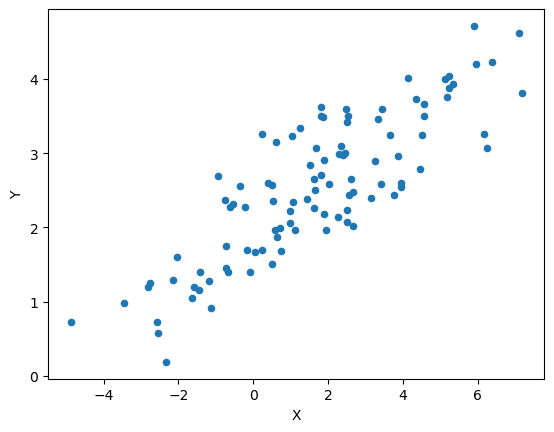

In [30]:
df.plot.scatter("X", "Y")

# Fitting the data

To fit our data, we want to load another package. `sklearn` is a data science and machine learning package available in python. For this example, we are not loading the whole package, we are just taking a function called `LinearRegression` from the `linear_model` part of `sklearn`. The line below will get this package.

In [31]:
from sklearn.linear_model import LinearRegression

You're probably familiar with fitting straight lines to data in Excel, this is how we do it in python. First we create a model. In python, this is an object, as you'll see if you type model in the box below, it exists, but currently has no data in it. You can think of an object as a program or app that has a few things that it can do. The technical term for this is that you've instantiated a `LinearRegression` object and have called it `model`. 

In [32]:
model = LinearRegression(fit_intercept=True)

In [33]:
model

LinearRegression()

Like a program, we can look up what the object is capable of doing, using `dir(model)`, which will give us the directory of functions the model we've instantiated can do. The only functions we care about today are `fit` and `predict` which are at the bottom of the list. Ignore anything starting with __, as these are internal functions you don't want to fiddle with. (N.B. if you just type `dir(model)` you'll get everything that `model` can do including the internal functions. The `[x for x in Y if x[0]!='_']` is a type of list comprehension that will return all the x's in Y if the first character is not an underscore. You don't need to worry about list comprehensions right now, all you need to know is that you can use `dir()` as a directory of what an object can do.

In [34]:
[x for x in dir(model) if x[0]!='_'] 

['copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'score',
 'set_params']

Now, we want to use this model object to fit our data. To do this, we call `model.fit()` and put our data in. `model.fit` requires two inputs, for each column of data (we know this as its in the manual:
[The manual for all python packages can be found online with a simple google search, click here for the sklearn manual](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) 
). 

`model.fit` requires a DataFrame as its first argument, which we get by calling `df[["X"]]` to get the x data, this could have more than one column, but only has one in our case. the second argument should be the labels, which we have called "Y" here, and this should be a series, and is called as `df["Y"]`, note the single brackets. Have a look at the inputs below. Note that `df[["X"]]` is a *column* of length 100 and `df[Y]` is a *list* of 100 targets. 

In [35]:
df[["X"]]

,X
0,5.910131
1,2.500393
2,3.946845
3,7.102233
4,6.168895
...,...
95,3.266433
96,1.526250
97,5.964676
98,1.817280


In [36]:
df["Y"]

0     4.714615
1     2.076238
2     2.548811
3     4.615368
4     3.264107
        ...   
95    2.894157
96    2.843770
97    4.201155
98    3.626802
99    3.419756
Name: Y, Length: 100, dtype: float64

Once we have created our model, we can fit it to the data by calling the fit() method on it. This takes two arguments:

The input data in the shape [n_samples, n_features].
The **labels** of the data in the shape [n_samples]

We only have 1 **feature**, that of "X".

Now to fit the `model` to our data, we put the input data (`[["X"]]`) and output data (`["Y"]`) into the `model.fit` function.

In [37]:
model.fit(df[["X"]], df["Y"])

LinearRegression()

Now, `model` fits the data! 

As we now have a fitted model, we can predict new values that were not in the original data. We're going to use this to plot a straight line fit to this data. 

First we make a set of x values, `xfit` which should cover the range we plotted over in the figure. (As ever, if you want to check what xfit actually is, you can ask by typing `xfit` into an empty box, to get a new box, hit B in edit mode. Do this to check that xfit goes from -6 to +8).

In [38]:
# np.linspace(a,b) gives you 50 linearly spaced out values between a and b
xfit = np.linspace(-6, 8)

In [39]:
xfit

array([-6.        , -5.71428571, -5.42857143, -5.14285714, -4.85714286,
       -4.57142857, -4.28571429, -4.        , -3.71428571, -3.42857143,
       -3.14285714, -2.85714286, -2.57142857, -2.28571429, -2.        ,
       -1.71428571, -1.42857143, -1.14285714, -0.85714286, -0.57142857,
       -0.28571429,  0.        ,  0.28571429,  0.57142857,  0.85714286,
        1.14285714,  1.42857143,  1.71428571,  2.        ,  2.28571429,
        2.57142857,  2.85714286,  3.14285714,  3.42857143,  3.71428571,
        4.        ,  4.28571429,  4.57142857,  4.85714286,  5.14285714,
        5.42857143,  5.71428571,  6.        ,  6.28571429,  6.57142857,
        6.85714286,  7.14285714,  7.42857143,  7.71428571,  8.        ])

Now we use `model.predict()` with our new data to generate our straight line fit. The `predict()` function takes an array of the same shape as the original input data ([n_samples, n_features]) so we use `xfit[:, np.newaxis]` to turn xfit from a list of [50] items to  column of [50, 1] (i.e. 50 rows, 1 column).

In [40]:
yfit = model.predict(xfit[:, np.newaxis])

C:\ProgramData\Anaconda3\envs\ml-for-chemists-tf2\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Now, lets plot the data again, using `df.plot.scatter()` assigning this to an axes object called `ax`. We can then add a second graph to these axes by using `ax.plot`, with the new x data and the fitted values.

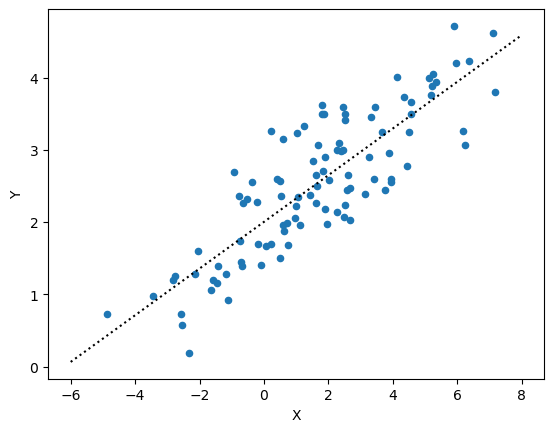

In [47]:
# this line does the scatter plot
ax = df.plot.scatter("X", "Y") 
# this line adds the best fit line
ax.plot(xfit, yfit, linestyle=":", color="black")

You should see that your data is now has a line of best fit from the model.

This fits the data to a straight line, with the equation $$y = m x + c,$$ where $m$ is the gradient and $c$ is the intercept. 

We can get these values from the model, 
* `model.coeff_[0]` is the first (zero-indexed, remember?) coefficient of the model, this is our gradient $m$. As this is a simple model, there is only have one coefficient. 
* `model.intercept_` is the intercept, i.e. $c$.

In [48]:
print("Model gradient: ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model gradient:  0.3229396867092762
Model intercept: 2.003167012462343


What if we want to predict the value of our fit when X = 10? 

We could to use the equation %y = m x + c%
which is done like this:

In [49]:
x_test = 10
y_test = model.coef_[0] * x_test + model.intercept_
print("y for y = m *10 + c is {}".format(y_test))

y for y = m *10 + c is 5.232563879555105


Alternatively, we can use the model to predict the y_test for us

In [44]:
# you have to create a DataFrame since the LinearRegression model expects it
X_new = pd.DataFrame({"X": [10]})
y_new = model.predict(X_new)
print("y = {}".format(y_new))

y = [5.23256388]


*An aside on terminology* When you've done this previously, you probably talked about fitting a line of best fit to some data, and you get an equation for the line. In this field, you fit a **model** to your data, which, in its simplest may be a striaght line. Note, the input data can be more than one dimension (i.e. you may have several columns of input, i.e `df[['X'],['G'],['Z']]` if we had input data labelled X, G and Z, and this is why the `df[[X]]` input in our code has two square brackets, we could have had several columns of X). The output data (y in this example) is sometimes called **labels**, as each input X can match to an output label which could even be a word like 'alcohol', 'aldehyde', and sometimes called **targets**, as you want to map X to a target. You usually have only one label, so `y` is usually a list, as in the example here, which is why we needed to use a single square bracket.

Now, we want to know how good our fit is at modelling the data. The most common way to evaluate the overall fit of a linear model is by the R-squared or $R^2$ value. R-squared is the proportion of variance explained, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the null model. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. R-squared is the sum of squares of the residuals, and the residuals are the **errrors** between the actual data an the **model**.

The R-squared value is given by the `model.score()` function, as below:

In [45]:
model.score(df[["X"]], df["Y"])

0.7147163547202338

An $R^2$ value of 0.71 is pretty good; 71\% of the variance in the input data has been explained by our model. 

## 2nd Model

As an exercise, fit this randomly generated data. 

In [63]:
np.random.seed(42)
x = 5 * np.random.randn(100) + 1.5   # Array of 100 values with mean = 1.5, stddev = 2.5
res = 5 * np.random.randn(100)       # Generate 100 residual terms
y = 5 + 2 * x + res                  # Actual values of Y

In [64]:
data = {'X':x, 'Y':y}
df = pd.DataFrame(data)

model = LinearRegression(fit_intercept = True)
model.fit(df[['X']], df[['Y']])

LinearRegression()

C:\ProgramData\Anaconda3\envs\ml-for-chemists-tf2\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


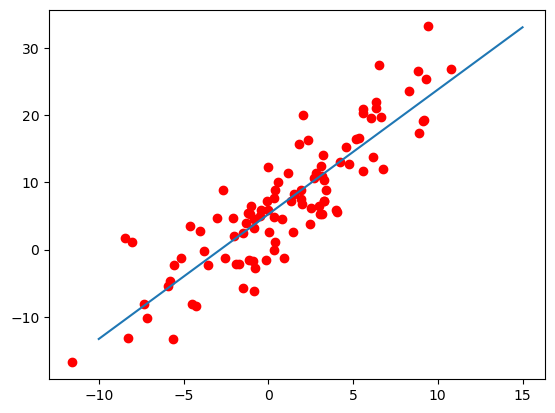

In [65]:
plt.plot(df['X'], df['Y'], 'ro')
X_new = np.linspace(-10, 15).reshape(-1,1)
y_new = model.predict(X_new)

plt.plot(X_new, y_new)

At this point, you should know how to use linear regression to fit a line to some data, have some experience with using jupyter, and have done your first data analysis in python. 

The next notebook is 2a_Workbook_Regression_Cellulose.